In [39]:
import inspect

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.io import arff

from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_iris, load_digits, load_breast_cancer

from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

%matplotlib inline

In [5]:
def get_pd_df(data, label='label'):
    X = data.data
    y = data.target
    df_X = pd.DataFrame(data=X, columns=data.feature_names)
    df_y = pd.DataFrame(data=y, columns=[label])
    df = pd.concat([df_X, df_y], axis=1)
    return df

def plot_decn_bdry(X, y, model_class, **model_params):
    """Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    
    One possible improvement could be to use all columns fot fitting
    and using the first 2 columns and median of all other columns
    for predicting.
    
    Adopted from:
    http://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html
    http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html
    """
    
    scaler = StandardScaler()
    X = StandardScaler().fit_transform(X)
    
    pca = PCA(n_components=2)
    X_t = pca.fit_transform(X)
    
    model = model_class(**model_params)
    model.fit(X, y)

    # Step size of the mesh
    h = .02 

    # Plot the decision boundary in 2 dimensions
    x_min, x_max = X_t[:, 0].min() - .5, X_t[:, 0].max() + .5
    y_min, y_max = X_t[:, 1].min() - .5, X_t[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    dstacked = np.dstack((xx, yy))
    shape_t = (xx.shape[0] * xx.shape[1], X.shape[1])
    predict_data = pca.inverse_transform(dstacked).reshape(shape_t)
    Z = model.predict(predict_data).reshape(xx.shape) 

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X_t[:, 0], X_t[:, 1], c=y, cmap=plt.cm.Spectral)
#     plt.contourf(xx, yy, Z, alpha=0.4)
#     plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    return plt

def get_freq_plot(df, col):
    val_cnt_df = pd.DataFrame(df[col].value_counts())
    freq_data = val_cnt_df.reset_index().rename(columns={'index': 'value', col:'count'})
    ax = sns.barplot(x="value", y="count",data=freq_data)

In [6]:
h = .02  # step size in the mesh

names = ["KNN", "Linear SVM", "RBF SVM", "Decision Tree", 
         "Random Forest", "Neural Net", "GradientBoostedMachines", "Naive Bayes"]
classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=3, n_estimators=100, max_features=4),
    MLPClassifier(hidden_layer_sizes=(10,)),
    GradientBoostingClassifier(max_depth=3, n_estimators=100, max_features=4),
    GaussianNB()]

train_frac_arr = np.linspace(.2, 1, 5)
# train_frac_arr = np.linspace(.1, 1, 10)
print(train_frac_arr)

NameError: name 'RandomForestClassifier' is not defined

In [7]:
def gen_knn_pipe():
    pipeline = Pipeline([('Scale', StandardScaler()), ('KNN', KNeighborsClassifier())])

    # set up parameter grid for parameters to search over
    params = {'KNN__metric': ['manhattan', 'minkowski', 'chebyshev'],
              'KNN__n_neighbors': np.arange(5, 30, 5),
              'KNN__weights': ['uniform', 'distance']
              }

In [8]:
data = load_breast_cancer()
label = 'diagnosis'

X, y = data.data, data.target
print(X.shape, y.shape)
print(list(data.target_names))
df = get_pd_df(data, label=label)
print(df.shape)

(569, 30) (569,)
['malignant', 'benign']
(569, 31)


In [6]:
# data = load_iris()
# label = 'species'

# X, y = data.data, data.target
# print(X.shape, y.shape)
# print(list(data.target_names))
# df = get_pd_df(data, label=label)
# print(df.shape)

In [7]:
# plot_decn_bdry(X, y, KNeighborsClassifier, n_neighbors=5)

In [77]:
df = pd.read_csv('wine-quality/winequality-red.csv', sep=';')
label = 'quality'
print(df.shape)
df.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [64]:
if label == 'quality':
    df[label] = df[label].map(lambda x: 0 if x in [3, 4, 5] else 1)

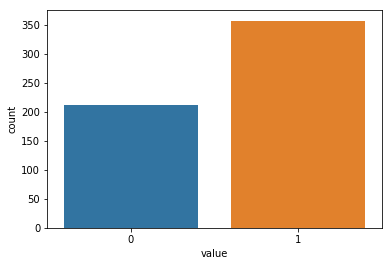

In [9]:
get_freq_plot(df, label)

In [11]:
df[label].value_counts()/df[label].value_counts().sum()

1    0.534709
0    0.465291
Name: quality, dtype: float64

In [12]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [13]:
def set_split(df, label):
    X = df[[col for col in df.columns if col != label]]
    y = df[label]
#     X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test

def train_test_score(X_train, y_train, X_test, y_test, clf):
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    return train_score, test_score

In [30]:
def plot_learning_curve_df(df, label, train_frac_arr, clf, y_min, y_max):
    X = df[[col for col in df.columns if col != label]]
    y = df[label]
    scorer = 'accuracy'
    train_sizes, train_scores, test_scores = \
        learning_curve(clf, X, y, n_jobs=-1, scoring= scorer, train_sizes=train_frac_arr, cv=4)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    plt.ylim(y_min, y_max)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    scores = pd.DataFrame({'train_scores_mean': train_scores_mean,
                           'train_scores_std': train_scores_std,
                           'test_scores_mean': test_scores_mean,
                           'test_scores_std': test_scores_std})
    return {'plot':plt, 'scores':scores}

def plot_validation_curve_df(df, label, param_name, param_range, clf, y_min, y_max, xlog_scale=False):
    X = df[[col for col in df.columns if col != label]]
    y = df[label]
    scorer = 'accuracy'
    train_scores, test_scores = validation_curve(clf, X, y, param_name=param_name, param_range=param_range, 
                                                 scoring=scorer, cv=4)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.xlabel("{}".format(param_name.replace('_', ' ')))
    plt.ylabel("Score")
    lw = 2
    
    if xlog_scale:
        plot_func = plt.semilogx
    else:
        plot_func = plt.plot
        
    plot_func(param_range, train_scores_mean, 'o-',
                 label="Training score", color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="darkorange", lw=lw)
    plot_func(param_range, test_scores_mean, 'o-',
                     label="Cross-validation score", color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.ylim(y_min, y_max)
    scores = pd.DataFrame({'train_scores_mean': train_scores_mean,
                           'train_scores_std': train_scores_std,
                           'test_scores_mean': test_scores_mean,
                           'test_scores_std': test_scores_std})
    return {'plot':plt, 'scores':scores}

In [15]:
y_min, y_max = 0.5, 0.9

CPU times: user 95.2 ms, sys: 34.5 ms, total: 130 ms
Wall time: 412 ms


,train_scores_mean,train_scores_std,test_scores_mean,test_scores_std
0,0.820084,0.007247,0.672909,0.062498
1,0.809499,0.011182,0.652271,0.041443
2,0.823366,0.009226,0.647901,0.026293
3,0.827424,0.009046,0.650406,0.005451
4,0.825897,0.007698,0.652285,0.006698


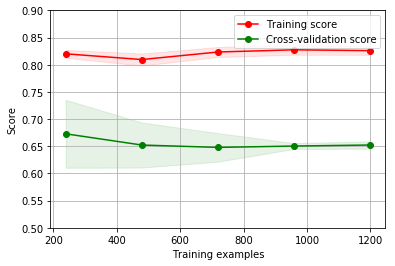

In [96]:
clf = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
%time plot_learning_curve_df(df, label, train_frac_arr, clf, y_min=.5, y_max=.9)['scores']

,train_scores_mean,train_scores_std,test_scores_mean,test_scores_std
0,0.766727,0.007521,0.585976,0.015486
1,0.721696,0.015742,0.606606,0.022207
2,0.717736,0.017598,0.621610,0.027555
3,0.703978,0.019709,0.629746,0.030039
4,0.698557,0.019738,0.625988,0.031419
5,0.693344,0.020559,0.629746,0.025109
6,0.690218,0.020044,0.634742,0.041793
7,0.680835,0.024075,0.624735,0.038936
8,0.679586,0.020398,0.639746,0.048585
9,0.673956,0.021467,0.634748,0.039096


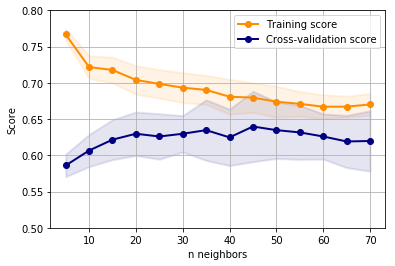

In [72]:
plot_validation_curve_df(df, label, 'n_neighbors', np.arange(5, 75, 5), KNeighborsClassifier(), 
                         y_min=.5, y_max=0.8)['scores']

CPU times: user 102 ms, sys: 37.5 ms, total: 140 ms
Wall time: 529 ms


,train_scores_mean,train_scores_std,test_scores_mean,test_scores_std
0,0.757322,0.000000,0.666039,0.034913
1,0.752610,0.009395,0.691670,0.053413
2,0.770167,0.009401,0.684168,0.035546
3,0.780240,0.012586,0.675410,0.032206
4,0.775438,0.011786,0.687299,0.017500


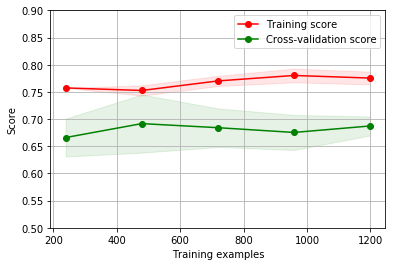

In [133]:
clf = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=15))
%time plot_learning_curve_df(df, label, train_frac_arr, clf, y_min=.5, y_max=0.9)['scores']

In [130]:
df.shape

(569, 31)

CPU times: user 105 ms, sys: 38.2 ms, total: 143 ms
Wall time: 222 ms


,train_scores_mean,train_scores_std,test_scores_mean,test_scores_std
0,0.906904,0.001812,0.651653,0.046717
1,0.857516,0.002712,0.633535,0.024449
2,0.827191,0.015593,0.689831,0.039949
3,0.808916,0.006444,0.681681,0.020341
4,0.805671,0.006157,0.699815,0.026601


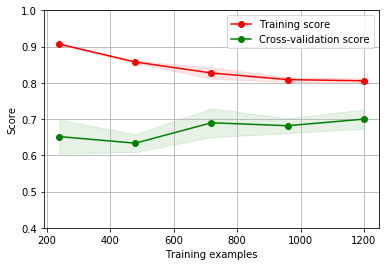

In [100]:
clf = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=5))
%time plot_learning_curve_df(df, label, train_frac_arr, clf, y_min=0.4, y_max=1)['scores']

CPU times: user 143 ms, sys: 38.9 ms, total: 182 ms
Wall time: 363 ms


,train_scores_mean,train_scores_std,test_scores_mean,test_scores_std
0,0.996862,0.001812,0.629749,0.039681
1,0.981733,0.015925,0.626645,0.009778
2,0.966620,0.008403,0.649193,0.042770
3,0.950730,0.000865,0.639168,0.025085
4,0.951209,0.010882,0.646678,0.030444


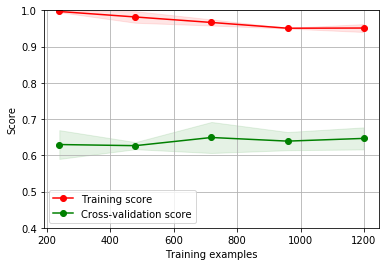

In [173]:
clf = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=10))
%time plot_learning_curve_df(df, label, train_frac_arr, clf, y_min=0.4, y_max=1)['scores']

,train_scores_mean,train_scores_std,test_scores_mean,test_scores_std
0,0.926777,0.004432,0.896348,0.013148
1,0.952554,0.007446,0.917438,0.030306
2,0.971879,0.002360,0.933259,0.024990
3,0.989454,0.002621,0.924480,0.026785
4,0.993556,0.002553,0.926241,0.028183
5,0.996486,0.002618,0.926253,0.029832
6,0.999415,0.001014,0.926216,0.022423
7,0.999415,0.001014,0.913929,0.026331
8,1.000000,0.000000,0.922732,0.026558
9,1.000000,0.000000,0.915702,0.022497


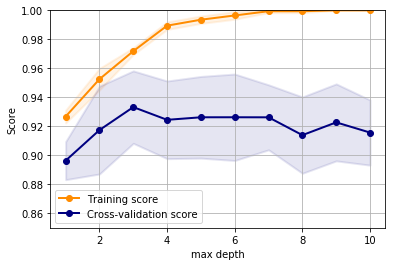

In [76]:
plot_validation_curve_df(df, label, 'max_depth', np.arange(1, 11, 1), DecisionTreeClassifier(), 
                         y_min=.85, y_max=1)['scores']

CPU times: user 110 ms, sys: 40.5 ms, total: 151 ms
Wall time: 530 ms


,train_scores_mean,train_scores_std,test_scores_mean,test_scores_std
0,0.942469,0.003469,0.705423,0.038933
1,0.885699,0.008001,0.711706,0.043641
2,0.860570,0.006697,0.722340,0.041935
3,0.840980,0.012696,0.711096,0.039379
4,0.826314,0.006196,0.720456,0.034793


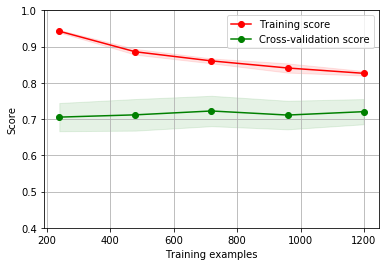

In [121]:
clf = make_pipeline(StandardScaler(), GradientBoostingClassifier(n_estimators=100, max_depth=2))
%time plot_learning_curve_df(df, label, train_frac_arr, clf, y_min=.4, y_max=1)['scores']

CPU times: user 113 ms, sys: 41.1 ms, total: 154 ms
Wall time: 1.36 s


,train_scores_mean,train_scores_std,test_scores_mean,test_scores_std
0,1.000000,0.000000,0.689815,0.027685
1,0.998956,0.001808,0.697956,0.042425
2,0.986439,0.003460,0.704829,0.039034
3,0.966893,0.007010,0.712336,0.021679
4,0.950375,0.005672,0.713582,0.041515


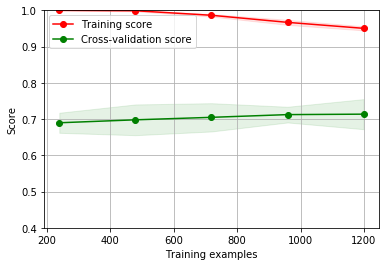

In [122]:
clf = make_pipeline(StandardScaler(), GradientBoostingClassifier(n_estimators=100, max_depth=4))
%time plot_learning_curve_df(df, label, train_frac_arr, clf, y_min=.4, y_max=1)['scores']

,train_scores_mean,train_scores_std,test_scores_mean,test_scores_std
0,0.846777,0.008131,0.727956,0.033736
1,0.887428,0.006427,0.724212,0.041260
2,0.916614,0.005992,0.721086,0.039482
3,0.939338,0.005693,0.722961,0.041642
4,0.958724,0.005295,0.714832,0.034102


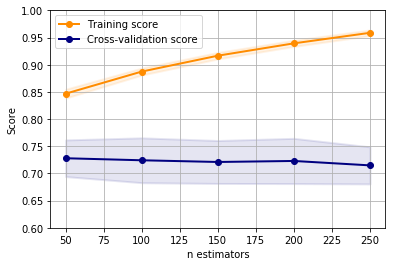

In [181]:
plot_validation_curve_df(df, label, 'n_estimators', np.arange(50, 300, 50), GradientBoostingClassifier(), 
                         y_min=.6, y_max=1)['scores']

CPU times: user 121 ms, sys: 42.5 ms, total: 163 ms
Wall time: 1.06 s


,train_scores_mean,train_scores_std,test_scores_mean,test_scores_std
0,1.000000,0.000000,0.707935,0.039517
1,0.992693,0.004783,0.693570,0.014402
2,0.973227,0.002671,0.707956,0.035489
3,0.954119,0.008662,0.706079,0.031135
4,0.937239,0.007256,0.721071,0.030478


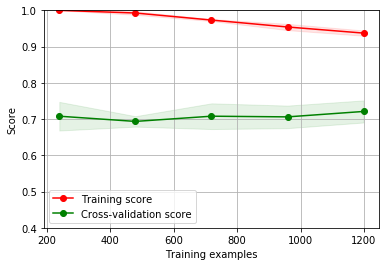

In [125]:
clf = make_pipeline(StandardScaler(), GradientBoostingClassifier(n_estimators=100, max_depth=4, max_features='sqrt'))
%time plot_learning_curve_df(df, label, train_frac_arr, clf, y_min=.4, y_max=1)['scores']

CPU times: user 127 ms, sys: 39.9 ms, total: 167 ms
Wall time: 591 ms


,train_scores_mean,train_scores_std,test_scores_mean,test_scores_std
0,0.789749,0.038047,0.719200,0.052569
1,0.759916,0.014688,0.723587,0.046058
2,0.754172,0.009452,0.718589,0.034418
3,0.749479,0.011875,0.721086,0.031564
4,0.748540,0.006527,0.727334,0.033968


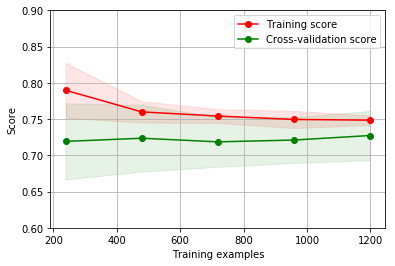

In [184]:
clf = make_pipeline(StandardScaler(), SVC(kernel='linear'))
%time plot_learning_curve_df(df, label, train_frac_arr, clf, y_min=.6, y_max=.9)['scores']

CPU times: user 121 ms, sys: 40.2 ms, total: 162 ms
Wall time: 449 ms


,train_scores_mean,train_scores_std,test_scores_mean,test_scores_std
0,0.816946,0.005435,0.717321,0.051760
1,0.818894,0.007137,0.723578,0.053192
2,0.820584,0.008574,0.729209,0.030301
3,0.813347,0.007663,0.727950,0.030635
4,0.802752,0.007211,0.722325,0.031737


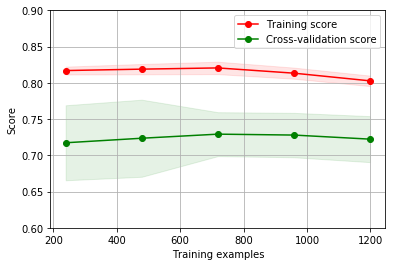

In [185]:
clf = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
%time plot_learning_curve_df(df, label, train_frac_arr, clf, y_min=.6, y_max=.9)['scores']

,train_scores_mean,train_scores_std,test_scores_mean,test_scores_std
0,0.590362,0.023300,0.582854,0.015325
1,0.612461,0.014580,0.614721,0.038478
2,0.624759,0.018457,0.622846,0.045846
3,0.654781,0.018721,0.631607,0.053404
4,0.733166,0.014438,0.637257,0.020535
5,0.869708,0.007528,0.631618,0.025637
6,0.996665,0.001560,0.572227,0.024773


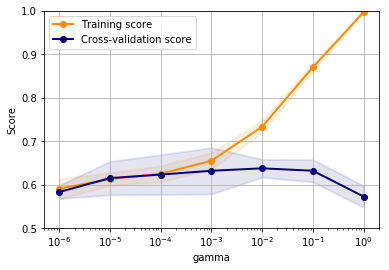

In [27]:
plot_validation_curve_df(df, label, 'gamma', np.logspace(-6, 0, 7), SVC(), 
                         xlog_scale = True, y_min=.5, y_max=1)['scores']

CPU times: user 93.1 ms, sys: 6.08 ms, total: 99.1 ms
Wall time: 3.43 s


,train_scores_mean,train_scores_std,test_scores_mean,test_scores_std
0,0.814854,0.022214,0.720451,0.047867
1,0.822025,0.007137,0.724195,0.038478
2,0.810153,0.006919,0.738589,0.031132
3,0.807091,0.007768,0.730459,0.031222
4,0.803795,0.008834,0.728581,0.036288


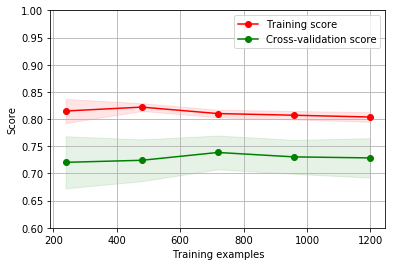

In [29]:
clf = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(50,)))
%time plot_learning_curve_df(df, label, train_frac_arr, clf, y_min=.6, y_max=1)['scores']

CPU times: user 99.9 ms, sys: 5.67 ms, total: 106 ms
Wall time: 3.48 s


,train_scores_mean,train_scores_std,test_scores_mean,test_scores_std
0,0.842050,0.011601,0.717924,0.053394
1,0.835073,0.005114,0.704815,0.041797
2,0.851182,0.016010,0.716700,0.028397
3,0.840459,0.009698,0.698564,0.028123
4,0.830901,0.014522,0.710450,0.036459


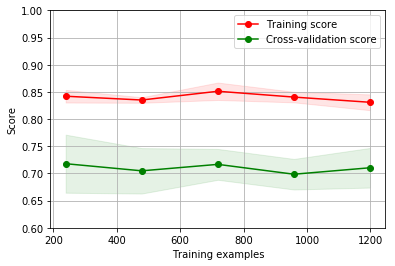

In [51]:
clf = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(20, 20)))
%time plot_learning_curve_df(df, label, train_frac_arr, clf, y_min=.6, y_max=1)['scores']

In [44]:
clf = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(20, 1)))

In [ ]:
activation : {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default ‘relu’

,train_scores_mean,train_scores_std,test_scores_mean,test_scores_std
0,0.933805,0.006465,0.920922,0.013468
1,0.928534,0.005309,0.913856,0.023638
2,0.928533,0.011513,0.906850,0.029207


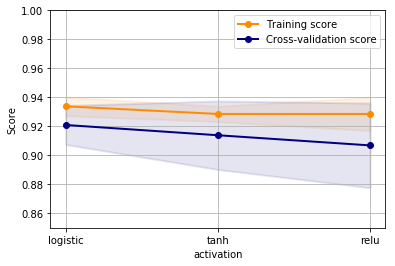

In [60]:
plot_validation_curve_df(df, label, 'activation', ['logistic', 'tanh', 'relu'], MLPClassifier(), 
                            y_min=.85, y_max=1)['scores']

In [42]:
print(inspect.getsource(validation_curve))

def validation_curve(estimator, X, y, param_name, param_range, groups=None,
                     cv='warn', scoring=None, n_jobs=None, pre_dispatch="all",
                     verbose=0, error_score='raise-deprecating'):
    """Validation curve.

    Determine training and test scores for varying parameter values.

    Compute scores for an estimator with different values of a specified
    parameter. This is similar to grid search with one parameter. However, this
    will also compute training scores and is merely a utility for plotting the
    results.

    Read more in the :ref:`User Guide <learning_curve>`.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples)